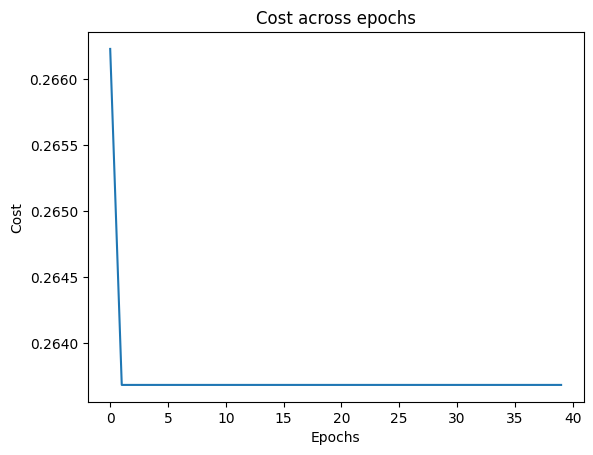

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math


class NeuralNetwork:
    def __init__(self, layers: tuple, activation_func, derivative_func) -> None:
        self._layers = layers
        self._weights = [np.zeros((layers[i], layers[i+1])) for i in range(len(layers)-1)]
        self._bias = [np.zeros(x) for x in layers[1:]]
        self.activation_func = activation_func
        self.derivative_func = derivative_func
        self.__cost = []

    def feed_forward(self, x):
        for i in range(len(self._weights)):
            x = self.activation_func(np.dot(x, self._weights[i]) + self._bias[i])
        return x

    def back_propagation(self, alpha, x, y):
        inputs = [x]
        outputs = [x]
        for i in range(len(self._weights)):
            x = np.dot(x, self._weights[i]) + self._bias[i]
            inputs.append(x)
            x = self.activation_func(x)
            outputs.append(x)
        error = y - outputs[-1]
        updates = []
        biases = []
        for i in range(len(self._weights)-1, -1, -1):
            if i==len(self._weights)-1:
                update = alpha*error*np.dot(outputs[i], self.derivative_func(inputs[i]))
                updates.append(update)
                biases.append(alpha*error)
            else:
                update = np.dot( np.dot( np.divide(updates[-1], outputs[i+1]), self._weights[i+1]) , np.dot(outputs[i], self.derivative_func(inputs[i])) )
                updates.append(update)
                biases.append( np.dot(self._weights[i+1], biases[-1]))
        updates.reverse()
        biases.reverse()
        return updates, biases, error

    def stochastic_gradient_descent(self, x, y, alpha):
        errors = []
        for i in range(len(x)):
            updates, biases, error = self.back_propagation(alpha, x[i], y[i])
            errors.append(error**2)
            for j in range(len(self._weights)):
                self._weights[j] += updates[j]
                self._bias[j] += biases[j]
        self.__cost.append(sum(errors)/len(errors))

    def batch_gradient_descent(self, x, y, alpha):
        errors = []
        weights = []
        biases = []
        for i in range(len(x)):
            update, bias, error = self.back_propagation(alpha, x[i], y[i])
            if len(weights)>0:
                for i in range(len(weights)):
                    weights[i] += update[i]
                    biases[i] += bias[i]
            else:
                weights = update
                biases = bias
            errors.append(error)
        for i in range(len(self._weights)):
            self._weights[i] += weights[i]/len(x)
            self._bias[i] += biases[i]/len(x)
        self.__cost.append(sum(errors)/len(errors))

    def train(self, x, y, alpha, epochs, gradient="stochastic"):
        if gradient=="stochastic":
            func = self.stochastic_gradient_descent
        elif gradient == "batch":
            func = self.batch_gradient_descent
        for j in range(epochs):
            func(x, y, alpha)

    def sigmoid(x):
        return 1/(1+np.exp(-x))

    def derivative_sigmoid(x):
        return np.exp(-x)/((1+np.exp(-x))**2)

    def ReLu(x):
        x = np.where(x==0, 0.5, x)
        x = np.where(x<0, 0, x)
        return x

    def derivative_ReLu(x):
        return np.where(x<=0, 0, 1)

    def show_cost(self):
        plt.plot(list(range(len(self.__cost))), self.__cost)
        plt.title("Cost across epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.show()



if __name__ == "__main__":
    import random
    _x = np.array([ [random.randint(0, 1) for i in range(1)] for x in range(1000) ])
    _y = np.array([ [random.randint(0,1)] for x in range(1000) ])

    nn = NeuralNetwork((1, 5, 1), NeuralNetwork.ReLu, NeuralNetwork.derivative_ReLu)
    nn.train(_x, _y, 0.1, 40, "stochastic")

    nn.show_cost()

In [48]:
from sklearn.datasets import load_iris
import numpy as np

x, y = load_iris(return_X_y = True)
_y = y
y = list(y)

for i in range(len(y)):
  if y[i] == 0:
    y[i] = np.array([1, 0, 0])
  elif y[i] == 1:
    y[i] = np.array([0, 1, 0])
  else:
    y[i] = np.array([0, 0, 1])
y = np.array(y)

[1.]
0


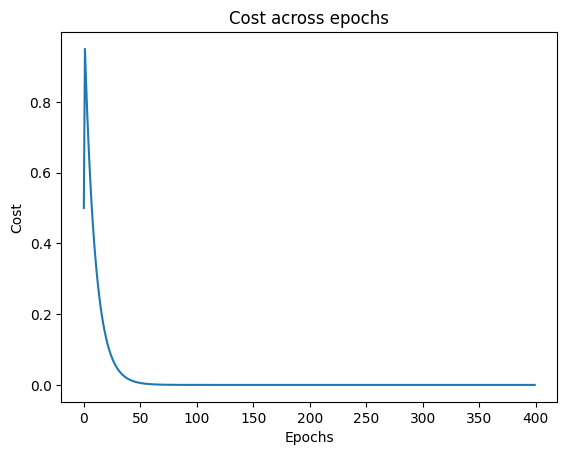

In [56]:
if __name__ == "__main__":
    import random

    nn = NeuralNetwork((4, 8, 8, 1), NeuralNetwork.ReLu, NeuralNetwork.derivative_ReLu)
    nn.train(x, _y, 0.1, 400, "batch")

    print(nn.feed_forward(x[0]))
    print(_y[0])

    nn.show_cost()